In [1]:
# Created by: Jess Gallo
# Date Created: 7/19/2022
# Last Modified: 7/19/2022
# Description: Forage - Cognizant AI Virtual Experience - Model Building (Task 3)

In [44]:
# Libraries
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [3]:
# import files
filename = '../Downloads/Cognizant Data/sales.csv'
dataCSV = pd.read_csv(filename, index_col=0)
sales = pd.DataFrame(dataCSV)

filename = '../Downloads/Cognizant Data/sensor_stock_levels.csv'
dataCSV = pd.read_csv(filename, index_col=0)
stock_levels = pd.DataFrame(dataCSV)

filename = '../Downloads/Cognizant Data/sensor_storage_temperature.csv'
dataCSV = pd.read_csv(filename, index_col=0)
storage_temp = pd.DataFrame(dataCSV)

In [4]:
sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
stock_levels.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [6]:
storage_temp.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Check if all datatypes are correct

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


In [8]:
stock_levels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 585.9+ KB


In [9]:
storage_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 746.6+ KB


# Cleaning Data

The timestamp column is of object dtype instead of datetime datatype. We need to fix that

In [10]:
# function to convert columns to datetime dtype
def to_datetime(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [11]:
sales = to_datetime(sales, 'timestamp')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 611.6+ KB


In [12]:
stock_levels = to_datetime(stock_levels, 'timestamp')
stock_levels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 585.9+ KB


In [13]:
storage_temp = to_datetime(storage_temp, 'timestamp')
storage_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 746.6+ KB


In [14]:
# function to convert all timestamps to round up hourly (i.e. 09:52:01 -> 09:00:00)
def convert_to_hourly(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    new_ts = dummy[column].tolist()
    new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
    new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
    dummy[column] = new_ts
    return dummy

In [15]:
sales = convert_to_hourly(sales, 'timestamp')
sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [16]:
stock_levels = convert_to_hourly(stock_levels, 'timestamp')
stock_levels.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [17]:
storage_temp = convert_to_hourly(storage_temp, 'timestamp')
storage_temp.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Now that we have all the datasets imported and timestamp fixed, we can now combine the datasets to make one full dataset.

We have to aggregate the timestamp and product_id columns

# Merge Data

In [18]:
sales_agg = sales.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


Each row now representat a unique combination of hour during which the sales took place from that weeks worth of data and the product_id. We summed the quantity and we took the mean average of the unit price.

In [19]:
stock_agg = stock_levels.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


This gives us the average stock percentages of each product at unique hours with the week of the sample data

In [20]:
storage_temp_agg = storage_temp.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
storage_temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


We could only groupby temperature for this dataset since this tables doesn't have a product_id column. We now have the average temperature of the storage place where the products are stored by unique hours during the week. 

Now we can finally merge all the tables together

In [21]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [22]:
merged_df = merged_df.merge(storage_temp_agg, on=['timestamp'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [24]:
merged_df.isnull().any()

timestamp              False
product_id             False
estimated_stock_pct    False
quantity                True
temperature            False
dtype: bool

The quantity column has a lot of missing data, we need to fix this before we do anything else. We will fill all missing values with 0 as per the client's request

In [25]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


Now we can add more columns (features) to the dataset. We'll include category and unit_price from the sales dataset

In [26]:
categories = sales[['product_id', 'category']]
categories = categories.drop_duplicates()

unit_price = sales[['product_id', 'unit_price']]
unit_price = unit_price.drop_duplicates()

In [27]:
merged_df = merged_df.merge(categories, on='product_id', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [28]:
merged_df = merged_df.merge(unit_price, on='product_id', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


# Feature Engineering

We now have to have the model in a way a machine learning model can handle it. We have to make each column numerical only

First, let's fix the tiemstamp column, since it's in datetime dtype. We need to separate out each month, week, weekday and hour into seperate columns

In [30]:
merged_df['day'] = merged_df['timestamp'].dt.day
merged_df['week'] = merged_df['timestamp'].dt.dayofweek
merged_df['hour'] = merged_df['timestamp'].dt.hour

merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day,week,hour
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [31]:
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day,week,hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


We can now concert the categorical column, category into numerical data by using dummy variables. A dummy variable is a binary flag column (1s and 0s).

In [33]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day,week,hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   day                             10845 non-null  int64  
 6   week                            10845 non-null  int64  
 7   hour                            10845 non-null  int64  
 8   category_baby products          10845 non-null  uint8  
 9   category_baked goods            10845 non-null  uint8  
 10  category_baking                 10845 non-null  uint8  
 11  category_beverages              10845 non-null  uint8  
 12  category_canned foods           

The last categorical column is the product_id, but it is not needed since each product_id is unique and we can use the  row index to identify each indidual row. 

In [35]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,day,week,hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Modeling

Our target variable is estimated_stock_pct since our focus is on predicting stock amounts for products on an hourly basis

For training, we will use cross-validation to hold back a portion of the dataset for etsting to compute how well the trained model is bale to predct the target variable

Finally, to ensure the model is able to perform, we will test it several times on random sample data. We do this with K-fold to train the model on K random samples of the data.

In [37]:
x = merged_df.iloc[:, 1:29]
y = merged_df.iloc[:, 0]

print(x.shape)
print(y.shape)

(10845, 28)
(10845,)


We have 28 predictor variables to train our model on and 10845 rows od data

Now we have to define how many folds we want to complete during training and how much of the dataset to assign to training, leaving the rest for test

Typically, we should leave 20-30% of the data for testing

In [39]:
k = 10
split = 75

In [43]:
accuracy = []

for fold in range(0, k):
    # Instantiate algorithm
    model = RandomForestRegressor()
    scaler = StandardScaler()
    
    # Create traing and test samples
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=split, random_state=42)
    
    # Scale x data to help algorithm converge and not be freedy with alrge values
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    # train model
    trained_model = model.fit(x_train, y_train)
    
    # Generate predictions on test sample
    y_pred = trained_model.predict(x_test)
    
    # Compute accuracy with mean absolute error
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    accuracy.append(mae)
    print(f'Fold {fold+1}: MAE = {mae:.3f}')
    
print(f'Average MAE: {(sum(accuracy) / len(accuracy)):.2f}')

Fold 1: MAE = 0.238
Fold 2: MAE = 0.238
Fold 3: MAE = 0.239
Fold 4: MAE = 0.238
Fold 5: MAE = 0.238
Fold 6: MAE = 0.238
Fold 7: MAE = 0.239
Fold 8: MAE = 0.239
Fold 9: MAE = 0.239
Fold 10: MAE = 0.239
Average MAE: 0.24


The MAE is almost identical each time. This is good because ti shows that the performance of trhe model is consistent across different random smaples of the data, which is what we want. It shows a robust nature.

MAE was chosen because it describes how closely the machine learning model was able to predict the exact value of estimated_stock_ct

Even though the model is rpedicting robustly, the MAE value is not very good since the average value of the target variable is around 0.51, meaning the accuracy as a percentage was around 50%. In an ideal world, we woudl want the MAE to be as low as possible. This is where the iterative process of machine learning comes in. At this stage, since we only have small samples of tyhe data, we can report back to the business with these findings and recommend that the dataset neeeds to be further engineered, or more datasets need to be added. 

We can use the trained model to interpret which features were significant when the model was predicting the target variable. We will use matplotlib and numpy to visualize the results.

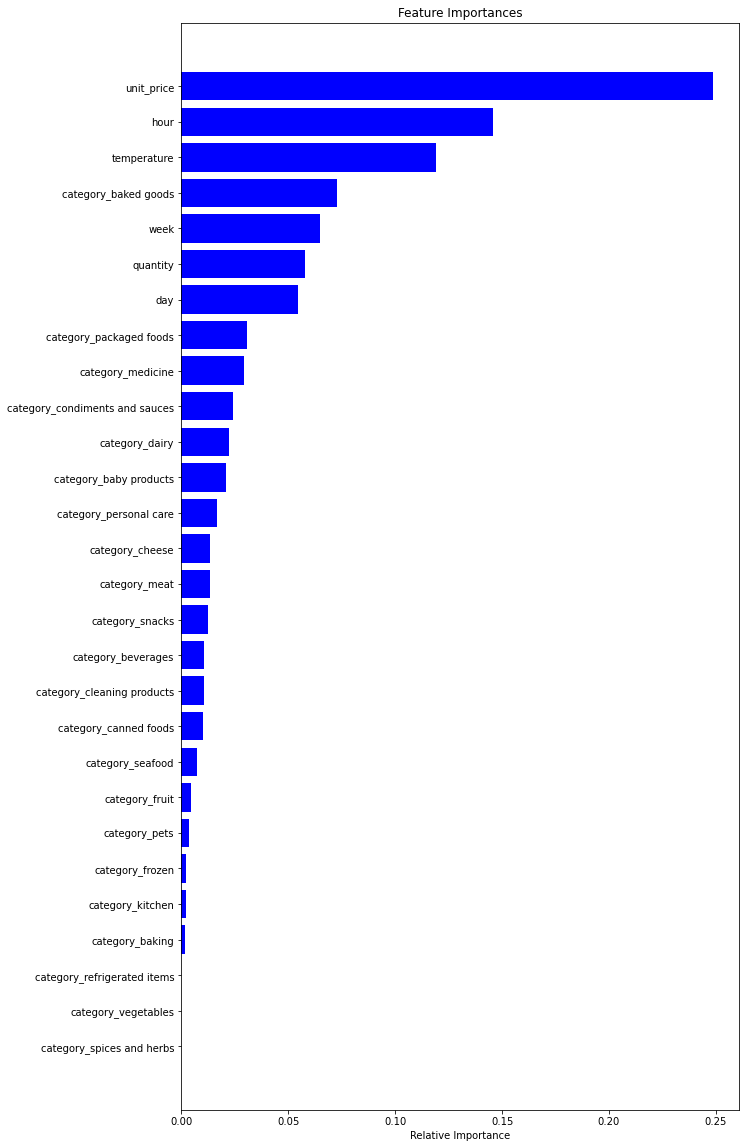

In [47]:
features = [i.split('__')[0] for i in x.columns]
importances= model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This shows us that the product columns (category) weren't important and that the unit_price, hour and temperature columns were very important